In [ ]:
from kalkulator import Kalkulator
from mytypes import *


: 

In [3]:
kredyt1=Kalkulator(kwota_kredytu=400000,ilosc_lat=30,stopa_procentowa=6.6,rodzaj_rat=RodzajRat.rowne,wskaznikBGK=7.14)

In [4]:
df=kredyt1.harmonogram_to_DF()
df

,Numer raty,Kapitał na początku okresu,Rata kapitałowa,Rata odsetkowa,Dopłata,Rata łączna,Kapitał na koniec okresu
0,1,400000.00,354.64,2200.00,0.0,2554.64,399645.36
1,2,399645.36,356.59,2198.05,0.0,2554.64,399288.77
2,3,399288.77,358.55,2196.09,0.0,2554.64,398930.22
3,4,398930.22,360.52,2194.12,0.0,2554.64,398569.70
4,5,398569.70,362.51,2192.13,0.0,2554.64,398207.19
...,...,...,...,...,...,...,...
354,355,15031.79,2471.97,82.67,0.0,2554.64,12559.82
355,356,12559.82,2485.56,69.08,0.0,2554.64,10074.26
356,357,10074.26,2499.23,55.41,0.0,2554.64,7575.03
357,358,7575.03,2512.98,41.66,0.0,2554.64,5062.05


In [5]:
import math
df['rok']=df['Numer raty'].apply(lambda x:math.ceil(x/12))
# show=df.groupby('rok')[['Rata odsetkowa','Rata kapitałowa']].sum()
# show.reset_index(inplace=True)
show = df[df['Numer raty']%12==0]


Text(0, 0.5, 'Number of Customers')

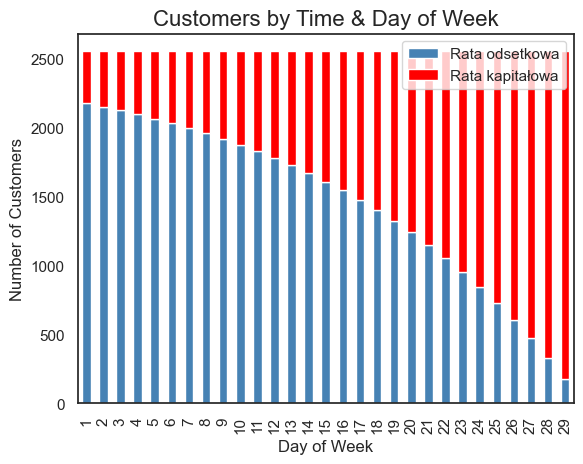

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

#set seaborn plotting aesthetics
sns.set(style='white')

#create stacked bar chart
show.plot(kind='bar',x='rok',y=['Rata odsetkowa','Rata kapitałowa'], stacked=True, color=['steelblue', 'red'])

#add overall title
plt.title('Customers by Time & Day of Week', fontsize=16)

#add axis titles
plt.xlabel('Day of Week')
plt.ylabel('Number of Customers')

#rotate x-axis labels
# plt.xticks(rotation=45)

In [7]:
kredyt2=Kalkulator(kwota_kredytu=400000.ilosc_lat=20,stopa_procentowa=8.46,rodzaj_rat=RodzajRat.malejace)
df=kredyt2.harmonogram_to_DF()
df['rok']=df['Numer raty'].apply(lambda x:math.ceil(x/12))
show=df.groupby('rok')[['Rata odsetkowa','Rata kapitałowa']].sum()
show.reset_index(inplace=True)

<Axes: xlabel='rok'>

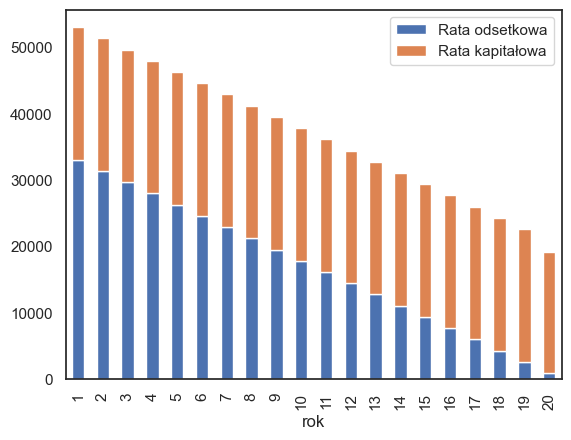

In [8]:
show.plot(kind='bar',x='rok',y=['Rata odsetkowa','Rata kapitałowa'], stacked=True)


In [9]:
gov=7.14
ile=25
bgk=7.14
kredyt=290000*0.963

kredyt3=Kalkulator(kwota_kredytu=kredyt,ilosc_lat=ile,stopa_procentowa=gov,rodzaj_rat=RodzajRat.malejace,wskaznikBGK=bgk)
df=kredyt3.harmonogram_to_DF()
df['Odsetki_po'] = df['Rata odsetkowa']-df['Dopłata']
df['po_laczna'] = df['Rata kapitałowa']+df['Odsetki_po']


In [10]:
df

,Numer raty,Kapitał na początku okresu,Rata kapitałowa,Rata odsetkowa,Dopłata,Rata łączna,Kapitał na koniec okresu,Odsetki_po,po_laczna
0,1,335094.00,1034.24,1993.81,0.0,3028.05,334059.76,1993.81,3028.05
1,2,334059.76,1034.24,1987.66,0.0,3021.90,333025.52,1987.66,3021.90
2,3,333025.52,1034.24,1981.50,0.0,3015.74,331991.28,1981.50,3015.74
3,4,331991.28,1034.24,1975.35,0.0,3009.59,330957.04,1975.35,3009.59
4,5,330957.04,1034.24,1969.19,0.0,3003.43,329922.80,1969.19,3003.43
...,...,...,...,...,...,...,...,...,...
318,319,6205.68,1034.24,36.92,0.0,1071.16,5171.44,36.92,1071.16
319,320,5171.44,1034.24,30.77,0.0,1065.01,4137.20,30.77,1065.01
320,321,4137.20,1034.24,24.62,0.0,1058.86,3102.96,24.62,1058.86
321,322,3102.96,1034.24,18.46,0.0,1052.70,2068.72,18.46,1052.70


In [11]:
round(df['Dopłata'].sum())

0

<Axes: xlabel='Numer raty'>

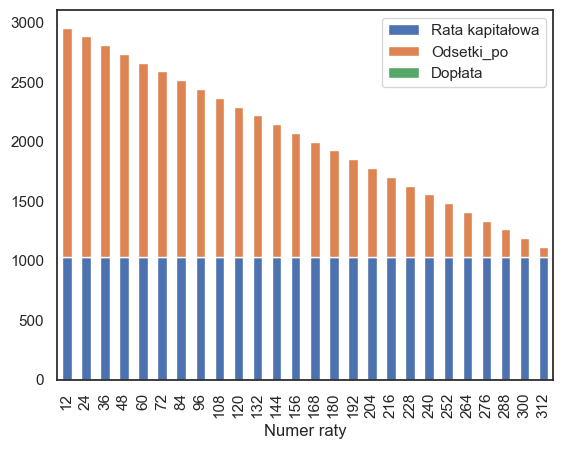

In [12]:
show = df[df['Numer raty']%12==0]
show.plot(kind='bar',x='Numer raty',y=['Rata kapitałowa','Odsetki_po','Dopłata'], stacked=True)

In [13]:
po=df.loc[120,'Kapitał na początku okresu']
ile=ile-10
kredyt3po=Kalkulator(kwota_kredytu=po,ilosc_lat=ile,stopa_procentowa=gov,rodzaj_rat=RodzajRat.rowne)

dfpo=kredyt3po.harmonogram_to_DF()
display(dfpo['Rata odsetkowa'].sum())
dfpo

153881.93999999997

,Numer raty,Kapitał na początku okresu,Rata kapitałowa,Rata odsetkowa,Dopłata,Rata łączna,Kapitał na koniec okresu
0,1,210985.20,533.25,1255.36,0.0,1788.61,210451.95
1,2,210451.95,536.42,1252.19,0.0,1788.61,209915.53
2,3,209915.53,539.61,1249.00,0.0,1788.61,209375.92
3,4,209375.92,542.82,1245.79,0.0,1788.61,208833.10
4,5,208833.10,546.05,1242.56,0.0,1788.61,208287.05
...,...,...,...,...,...,...,...
198,199,10512.92,1726.06,62.55,0.0,1788.61,8786.86
199,200,8786.86,1736.33,52.28,0.0,1788.61,7050.53
200,201,7050.53,1746.66,41.95,0.0,1788.61,5303.87
201,202,5303.87,1757.05,31.56,0.0,1788.61,3546.82


In [111]:
# BGK
gov=8.46
ile=20
bgk=8.46*0.9
kredyt=250000

# PEAKO
gov=7.14
ile=27
bgk=7.14
r3=9.45 # WOW WIBOR 3M 6,9% + marza 2,55!?
kredyt=335094 #+9925.12

kredyt4=Kalkulator(kwota_kredytu=kredyt,ilosc_lat=ile,stopa_procentowa=gov,rodzaj_rat=RodzajRat.bezpieczny,wskaznikBGK=bgk,stopa_procentowa3=r3)
df=kredyt4.harmonogram_to_DF()
df['Odsetki_po'] = df['Rata odsetkowa']-df['Dopłata']
df['po_laczna'] = df['Rata kapitałowa']+df['Odsetki_po']
df

,Numer raty,Kapitał na początku okresu,Rata kapitałowa,Rata odsetkowa,Dopłata,Rata łączna,Kapitał na koniec okresu,Odsetki_po,po_laczna
0,1,335094.00,1034.24,1993.81,1435.32,3028.05,334059.76,558.49,1592.73
1,2,334059.76,1034.24,1987.66,1430.89,3021.90,333025.52,556.77,1591.01
2,3,333025.52,1034.24,1981.50,1426.46,3015.74,331991.28,555.04,1589.28
3,4,331991.28,1034.24,1975.35,1422.03,3009.59,330957.04,553.32,1587.56
4,5,330957.04,1034.24,1969.19,1417.60,3003.43,329922.80,551.59,1585.83
...,...,...,...,...,...,...,...,...,...
318,319,12153.66,1986.00,95.71,0.00,2081.71,10167.66,95.71,2081.71
319,320,10167.66,2001.64,80.07,0.00,2081.71,8166.02,80.07,2081.71
320,321,8166.02,2017.40,64.31,0.00,2081.71,6148.62,64.31,2081.71
321,322,6148.62,2033.29,48.42,0.00,2081.71,4115.33,48.42,2081.71


In [103]:
# import numpy as np
# df.iloc[np.r_[0:5, 118:122, ]]
df['Odsetki_po'].sum(),df['Dopłata'].sum()

(256390.84000000003, 140608.2)

([<matplotlib.axis.YTick at 0x248fb21bc50>,
 [Text(0, 0, '0'),
  Text(0, 250, '250'),
  Text(0, 500, '500'),
  Text(0, 750, '750'),
  Text(0, 1000, '1000'),
  Text(0, 1250, '1250'),
  Text(0, 1500, '1500'),
  Text(0, 1750, '1750'),
  Text(0, 2000, '2000'),
  Text(0, 2250, '2250'),
  Text(0, 2500, '2500'),
  Text(0, 2750, '2750')])

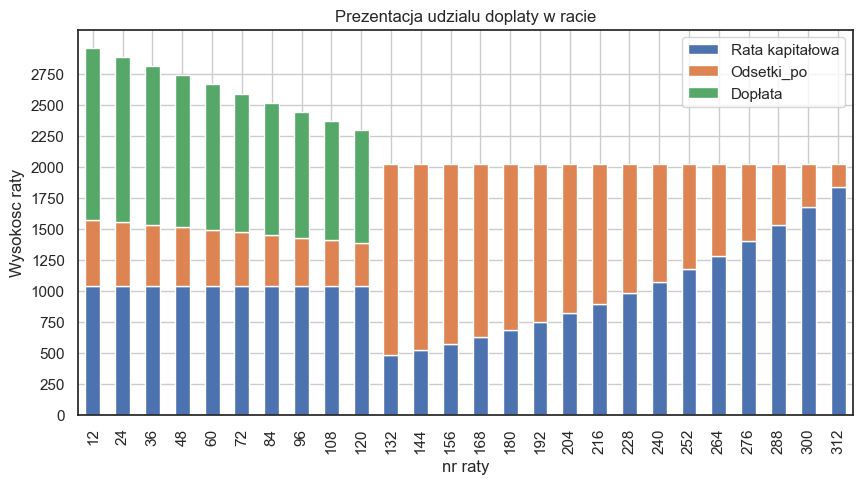

In [104]:
show = df[df['Numer raty']%12==0]
show.plot(kind='bar',x='Numer raty',y=['Rata kapitałowa','Odsetki_po','Dopłata'], stacked=True,figsize=(10,5))
plt.title('Prezentacja udzialu doplaty w racie')
plt.xlabel('nr raty')
plt.ylabel('Wysokosc raty')
plt.grid(True)
plt.yticks(range(0,int(show['Rata łączna'].max()),250))



In [105]:
# TODO
# mozliwosc naplaty 3 lata zakaz

# PEKAO?
# dopłaty BGK w wysokości 1 435,32 zł)  w wysokości 1 592,73 zł, 
# odsetki (BGK w wysokości 140 608,20 zł) ja 268 395,53 zł
# po 2 081,71 zł, 

# całkowita kwota kredytu 335 094 złotych (zł) (kwota kredytu, która nie obejmuje kredytowanych kosztów kredytu), 
# kredyt zaciągnięty na 27 lat , 324 miesięcznych rat do spłaty, 
# wniesiony wkład własny klienta: 0 % całkowitego kosztu kredytowanej inwestycji
# stałe oprocentowanie kredytu 7,14% w stosunku rocznym, 
# pierwsza rata kapitałowo-odsetkowa ( przy założeniu dopłaty BGK w wysokości 1 435,32 zł)  w wysokości 1 592,73 zł, 
# pierwsza rata kapitałowo-odsetkowa ( po zakończonym )  w wysokości 2 081,71 zł, 
# całkowita kwota do zapłaty przez konsumenta 
# (przy założeniu dopłat BGK w wysokości 140 608,20 zł do pierwszych 120 rat kapitałowo-odsetkowych) wynosi 613 414,65 zł,
# całkowity koszt kredytu 278 320,65 zł przy uwzględnieniu następujących kosztów: 
# odsetki (przy założeniu dopłat BGK w wysokości 140 608,20 zł) 268 395,53 zł
# oraz koszty z tytułu: opłaty prowizyjnej należnej BGK z tytułu udzielenia Gwarancji 670,19 zł 
# ubezpieczenia nieruchomości (innego przedmiotu) obciążonej hipoteką od ognia i innych zdarzeń losowych za 12 m-cy   335,09 zł, 
# opłaty miesięcznej za kartę debetową MasterCard Debit FX wydaną do rachunku 4 zł, 
# opłaty za kontrolę nieruchomości (innego prawa) 184,50 zł, 
# podatku od czynności cywilnoprawnych od ustanowienia hipoteki 19 zł.

# prowizja=4930 # prowizji nie kredytuja
oplatagwarancji= 670.19
# ubezpieczenieZyci=5800
ubezpieczenieNier=335.09*27 #za 12 m-cy
kontrola=184.50
# wycena=400
pcc=19

kredyt=335094
# samekoszty=prowizja+oplatagwarancji+ubezpieczenie+wycena+pcc #9925.12
odsetki=268395.53
# calekoszty=278320.65
total=613414.65

In [106]:
# PKO
# pierwsza 1 483,09 zł, 
# równe  1 760,66 zł (ostatnia 1 704,78 zł).

prowizja=4930 # prowizji nie kredytuja
oplatagwarancji=490.86
ubezpieczenie=5800
wycena=400
pcc=19

kredyt=290000
samekoszty=prowizja+oplatagwarancji+ubezpieczenie+wycena+pcc
odsetki=207941.70
# calekoszty=219581.56
total=509581.56

r1=5.97+2-0.83 #7.14
r2=8.95
r3=8.95
ile=25
bgk=7.14
kredyt=296710
# *0.963

In [107]:

kredyt4=Kalkulator(kwota_kredytu=kredyt,ilosc_lat=ile,stopa_procentowa=r1,stopa_procentowa2=r2,stopa_procentowa3=r3,rodzaj_rat=RodzajRat.bezpieczny,wskaznikBGK=bgk)
df=kredyt4.harmonogram_to_DF()
df['Odsetki_po'] = df['Rata odsetkowa']-df['Dopłata']
df['po_laczna'] = df['Rata kapitałowa']+df['Odsetki_po']
df


,Numer raty,Kapitał na początku okresu,Rata kapitałowa,Rata odsetkowa,Dopłata,Rata łączna,Kapitał na koniec okresu,Odsetki_po,po_laczna
0,1,296710.00,989.03,1765.42,1270.91,2754.45,295720.97,494.51,1483.54
1,2,295720.97,989.03,1759.54,1266.67,2748.57,294731.94,492.87,1481.90
2,3,294731.94,989.03,1753.66,1262.44,2742.69,293742.91,491.22,1480.25
3,4,293742.91,989.03,1747.77,1258.20,2736.80,292753.88,489.57,1478.60
4,5,292753.88,989.03,1741.89,1253.96,2730.92,291764.85,487.93,1476.96
...,...,...,...,...,...,...,...,...,...
294,295,10526.15,1721.86,78.51,0.00,1800.37,8804.29,78.51,1800.37
295,296,8804.29,1734.70,65.67,0.00,1800.37,7069.59,65.67,1800.37
296,297,7069.59,1747.64,52.73,0.00,1800.37,5321.95,52.73,1800.37
297,298,5321.95,1760.68,39.69,0.00,1800.37,3561.27,39.69,1800.37


In [108]:
# SCENARIUSZE
# in
r1=8
# r2=8
# r3=3
ile=25
# bgk=7.14
kredyt=296710

# out
odsetki=1
rata=1 #<2300
# kredyt po 10latach

In [ ]:
# alior

# kredyt przeznaczony na cel mieszkaniowy w PLN, okres obowiązywania umowy: 300 miesięcy, 
# całkowita kwota kredytu (bez kredytowanych kosztów): 346 000 zł, 
# LTV (stosunek kwoty kredytu do wartości zabezpieczenia) 79,36%, 
# w okresie pierwszych 60 rat, stopa okresowo stała w wysokości 6,909%,
# w kolejnym okresie, tj. od dnia spłaty 60 raty kredytu do dnia spłaty 120 raty kredytu, stopa okresowo stała nie uległa zmianie, 
# a następnie w kolejnych latach oprocentowanie kredytu zmienne w wysokości 8,95% 
# (na oprocentowanie zmienne składa się: marża 2,05% i wskaźnik referencyjny WIBOR 3M 6,9% - po 10 letnim okresie wartość wskaźnika referencyjnego 
#  ustalona będzie na podstawie obowiązującej w przedostatnim dniu roboczym poprzedzającym dzień spłaty 120 raty kredytu); 

# dopłaty do rat w okresie 120 miesięcy zostały wyliczone wg wskaźnika średniej kwartalnej stopy procentowej [W] o wartości 7,14%;
# całkowity koszt kredytu: 277 229,83 zł, w tym prowizja: 0 zł, odsetki: 219 663,33 zł, koszt ubezpieczenia nieruchomości (opłacany rocznie): 
# 9 265,00 zł, ubezpieczenia na życie: 17 300 zł 
# (składka opłacana jednorazowo za okres pierwszych 5 lat okresu ubezpieczenia oferowanego przez Alior Bank SA),
# suma składek ubezpieczenia na życie opłacanych miesięcznie po upływie okresu 5 lat: 30 382,20 zł, 
# koszt ustanowienia hipoteki: 200 zł, opłata z tytułu inspekcji nieruchomości: 250 zł, wpis roszczenia o ustanowienie hipoteki 150 zł, 
# podatek od czynności cywilnoprawnych (PCC) 19 zł; całkowita kwota do zapłaty: 623 229,83 zł. 

# Bezpieczny kredyt 2 procent jest płatny łącznie w 300 miesięcznych ratach. W okresie dopłat w ratach malejących gdzie pierwsza rata wynosi 1 707,07 zł,
# natomiast po okresie objętym dopłatami w ratach annuitetowych (równych) z szacunkową ratą kredytu wynoszącą 2 254,54 zł. 

# gdzie pierwsza rata wynosi 1 707,07 zł
# po stale 2 254,54 zł. 

In [131]:

prowizja=0 
oplatagwarancji=0
ubezpieczenieZ=17300 + 30382.20 #piersze5lat 5% i reszta NIE kredytowana
ubezpieczenieN=9265
inspekcja=400
hipoteka=200+150
pcc=19

kredyt=346000 #(bez kredytowanych kosztów): 
samekoszty=oplatagwarancji+ubezpieczenieZ+ubezpieczenieN+inspekcja+hipoteka+pcc #57566.50
odsetki=219663.33
# calekoszty=277229.83
total=623229.83

0.005

In [117]:
# ALIOR 5,22%

r1=6.909
r2=6.909
r3=8.95
ile=25
bgk=7.14
kredyt=346000+57566.50-30382.20

kredyt4=Kalkulator(kwota_kredytu=kredyt,ilosc_lat=ile,stopa_procentowa=r1,stopa_procentowa2=r2,stopa_procentowa3=r3,rodzaj_rat=RodzajRat.bezpieczny,wskaznikBGK=bgk)
df=kredyt4.harmonogram_to_DF()
df['Odsetki_po'] = df['Rata odsetkowa']-df['Dopłata']
df['po_laczna'] = df['Rata kapitałowa']+df['Odsetki_po']
df

,Numer raty,Kapitał na początku okresu,Rata kapitałowa,Rata odsetkowa,Dopłata,Rata łączna,Kapitał na koniec okresu,Odsetki_po,po_laczna
0,1,373184.30,1243.95,2148.61,1598.47,3392.56,371940.35,550.14,1794.09
1,2,371940.35,1243.95,2141.45,1593.14,3385.40,370696.40,548.31,1792.26
2,3,370696.40,1243.95,2134.28,1587.82,3378.23,369452.45,546.46,1790.41
3,4,369452.45,1243.95,2127.12,1582.49,3371.07,368208.50,544.63,1788.58
4,5,368208.50,1243.95,2119.96,1577.16,3363.91,366964.55,542.80,1786.75
...,...,...,...,...,...,...,...,...,...
294,295,13239.52,2165.65,98.74,0.00,2264.39,11073.87,98.74,2264.39
295,296,11073.87,2181.80,82.59,0.00,2264.39,8892.07,82.59,2264.39
296,297,8892.07,2198.07,66.32,0.00,2264.39,6694.00,66.32,2264.39
297,298,6694.00,2214.46,49.93,0.00,2264.39,4479.54,49.93,2264.39


([<matplotlib.axis.YTick at 0x248fb7f8c10>,
 [Text(0, 0, '0'),
  Text(0, 250, '250'),
  Text(0, 500, '500'),
  Text(0, 750, '750'),
  Text(0, 1000, '1000'),
  Text(0, 1250, '1250'),
  Text(0, 1500, '1500'),
  Text(0, 1750, '1750'),
  Text(0, 2000, '2000'),
  Text(0, 2250, '2250'),
  Text(0, 2500, '2500'),
  Text(0, 2750, '2750'),
  Text(0, 3000, '3000'),
  Text(0, 3250, '3250')])

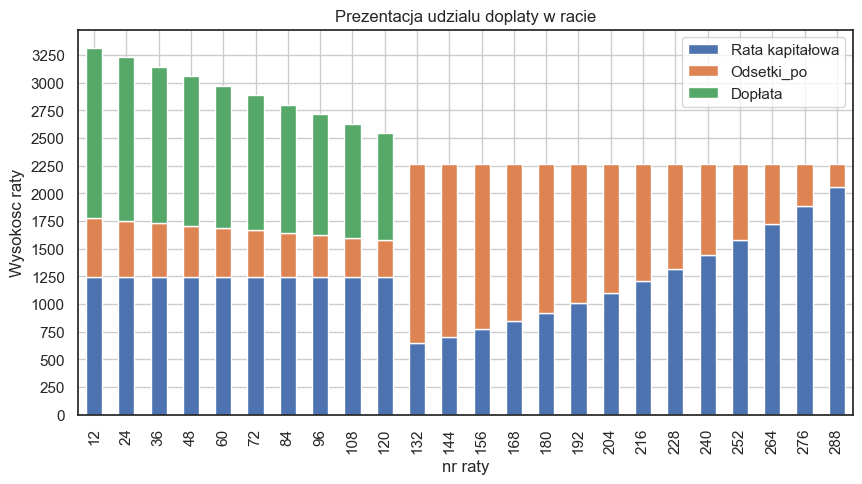

In [118]:
show = df[df['Numer raty']%12==0]
show.plot(kind='bar',x='Numer raty',y=['Rata kapitałowa','Odsetki_po','Dopłata'], stacked=True,figsize=(10,5))
plt.title('Prezentacja udzialu doplaty w racie')
plt.xlabel('nr raty')
plt.ylabel('Wysokosc raty')
plt.grid(True)
plt.yticks(range(0,int(show['Rata łączna'].max()),250))


In [ ]:
# Rzeczywista Roczna Stopa Oprocentowania (RRSO) dla kredytu mieszkaniowego Bezpieczny kredyt 2% z okresowo stałym oprocentowaniem, 
# w VeloBank S.A. zabezpieczonego hipoteką wynosi 4,92%. RRSO obliczyliśmy przy następujących założeniach: 
# kredyt został wypłacony w całości w jednej transzy, okres kredytowania: 360 miesięcy, całkowita kwota kredytu (bez kredytowanych kosztów): 360 000 zł, 
# LTV (kwota kredytu do wartości zabezpieczenia): 90%,
# oprocentowanie stałe w okresie pierwszych 10 lat: 7,14% w skali roku,
# w dalszym okresie oprocentowanie zmienne wynosi 8,08604%, a WIRON 1M Stopa Składana wynosi 5,94604% (według stanu na 15.06.2023 r.),
# całkowity koszt kredytu – z uwzględnieniem dopłat: 340 112,59 zł w tym: 
# prowizja: 7200 zł, 
# odsetki: 459 433,99 zł,
# kwota dopłat: 154 457,00 zł,
# podatek od czynności cywilnoprawnych (PCC) 19 zł, 
# prowizja od gwarancji BGK: 400 zł, 
# usługi dodatkowe:
# ubezpieczenie nieruchomości dystrybuowane przez bank – koszt ubezpieczenia w całym okresie kredytowania: 5 112 zł, 
# ubezpieczenie VeloBezpieczny dystrybuowane przez bank – koszt ubezpieczenia 22 404,60; 
# całkowita kwota do zapłaty – z uwzględnieniem dopłat: 700 112,59 zł,
# liczba rat: 360 - raty malejące (bez okresu karencji w spłacie) w okresie pierwszych 10 lat, a od 11 roku raty równe, 
# dopłaty do rat stosowane przez okres 120 miesięcy, wyliczone wg wskaźnika W o wartości 7,14%. 
# W RRSO nie uwzględniliśmy kosztu operatu szacunkowego nieruchomości (koszt nieznany bankowi) – usługa zlecana przez klienta we własnym zakresie,
# niedostępna za pośrednictwem banku. 

In [129]:
# VELO 4,92% 90%
prowizja=7200 
oplatagwarancji=400
ubezpieczenieZ=22404.60 
ubezpieczenieN=5112
inspekcja=280
pcc=19

kredyt=360000 #(bez kredytowanych kosztów): 
samekoszty=prowizja+oplatagwarancji+ubezpieczenieZ+ubezpieczenieN+inspekcja+pcc #35415
odsetki=459433.99-154457
calekoszty=340112.59
total=700112.59

r1=7.14
r2=7.14
r3=8.086
ile=30
bgk=7.14
kredyt=360000+35135



359999.99999999994

In [ ]:
# # PBS
# Rzeczywista Roczna Stopa Oprocentowania (RRSO) dla Bezpiecznego Kredyt Mój DOM udzielonego na zasadach określonych w Ustawie z dnia 1 października 2021
# r. o rodzinnym kredycie mieszkaniowym i bezpiecznym kredycie 2% wynosi: 4,86% (bez dopłaty: 8,62%) dla następujących założeń:
# kredyt przeznaczony na cel mieszkaniowy i wypłacony jednorazowo,
# całkowita kwota kredytu: 347 130 zł, okres kredytowania: 305 miesięcy; 
# wkład własny: 30% wartości nieruchomości; oprocentowanie okresowo - stałe kredytu w okresie dwóch pierwszych cykli 60-cio miesięcznych: 
# 7,14 % w skali roku, a następnie oprocentowanie zmienne 9,09 % w skali roku – 
# wyliczone jako suma aktualnej stopy bazowej kredytu (stopa zmienna WIBOR 3M: 6,90%) i indywidualnie ustalonej marży w wysokości: 2,19%, 
# pierwsza rata kapitałowo – odsetkowa płatna przez Kredytobiorcę wynosi 1693,26 zł przy uwzględnieniu dopłaty BGK w wysokości 1482,00 zł,
# łączna liczba rat: 305. Całkowity koszt kredytu 402 141,96 zł , 
# w tym: suma odsetek w całym okresie kredytowania: 390 142,49 zł  (przy uwzględnieniu dopłaty BGK w wysokości 143 032,36 zł), 
# prowizja  za udzielenie kredytu: 1,90 % kwoty udzielonego kredytu wynosząca: 6595,47 zł,
# koszt prowadzenia rachunku bankowego w całym okresie kredytowania 5185 zł. Koszt ustanowienia hipoteki: 200 zł,
# podatek od czynności cywilno-prawnych (PCC): 19 zł.
# W całkowitym koszcie kredytu Bank nie uwzględnia następujących kosztów: 
# kosztu ubezpieczenia kredytowanej nieruchomości oraz kosztu wyceny nieruchomości, gdyż nie jest dostawcą tych usług dodatkowych dla konsumenta.

# Całkowita kwota do zapłaty wynosi 749 271,96 zł przy czym powyższa kwota uwzględnia dopłaty BGK w wysokości 143 032,36 zł. 


#  1693,26 zł przy uwzględnieniu dopłaty BGK w wysokości 1482,00 zł
# dopłaty BGK w wysokości 143 032,36 zł)

In [130]:
# PBS 4,86% 70%
prowizja=6595.47 #1.9
oplatagwarancji=0
konto=5185
ubezpieczenieZ=0
ubezpieczenieN=0
inspekcja=0
hipoteka=200
pcc=19

kredyt=347130
samekoszty=prowizja+konto+hipoteka+pcc #12000
odsetki=390142.49
calekoszty=402141.96
total=749271.96

r1=7.14
r2=7.14
r3=9.09 #2,19%
ile=25.4 #305
bgk=7.14
kredyt=347130+12000


11999.47000000003